In [12]:
# M Science Software/Cloud Coverage Analysis
# Surface Level Financial & Market Metrics Analysis
# Covering Charles Rogers' research universe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# Charles Rogers' Coverage Universe
tickers = {
    # Cloud Infrastructure / Hyperscalers
    'AMZN': 'Amazon (AWS)',
    'MSFT': 'Microsoft (Azure)', 
    'GOOGL': 'Google (GCP)',
    
    # Software Infrastructure & DevTools
    'ORCL': 'Oracle',
    'MDB': 'MongoDB',
    'NET': 'Cloudflare',
    'FSLY': 'Fastly',
    'AKAM': 'Akamai',
    'GTLB': 'GitLab',
    'TEAM': 'Atlassian',
    
    # Cloud Native & Storage
    'DOCN': 'DigitalOcean',
    'DBX': 'Dropbox',
    
    # Enterprise Software
    'DOCU': 'DocuSign',
    'ZM': 'Zoom',
    'INTU': 'Intuit',
    
    # European/International (using US-listed ADRs where possible)
    'DT': 'Deutsche Telekom',
    
    # Other
    'LZ': 'LegalZoom',
    'VMEO': 'Vimeo'
}

print("🔍 M Science Software/Cloud Coverage Analysis")
print("=" * 50)
print(f"Total companies in coverage: {len(tickers)}")
print("Using Alpha Vantage API for financial data...")

# =============================================================================
# DATA CREATION - Since we can't rely on external APIs, we'll create realistic 
# sample data based on known market conditions for these companies
# =============================================================================

def create_sample_financial_data():
    """
    Create realistic financial data for M Science coverage companies
    Based on approximate market conditions as of 2024/2025
    """
    
    sample_data = {
        'AMZN': {
            'name': 'Amazon (AWS)',
            'market_cap_b': 1800,
            'current_price': 185.0,
            'ytd_return': 15.2,
            'pe_ratio': 45.3,
            'ps_ratio': 3.1,
            'revenue_ttm_b': 580.0,
            'sector': 'Technology',
            'industry': 'Internet Retail'
        },
        'MSFT': {
            'name': 'Microsoft (Azure)',
            'market_cap_b': 3200,
            'current_price': 430.0,
            'ytd_return': 8.7,
            'pe_ratio': 32.1,
            'ps_ratio': 13.2,
            'revenue_ttm_b': 245.0,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'GOOGL': {
            'name': 'Google (GCP)',
            'market_cap_b': 2100,
            'current_price': 168.0,
            'ytd_return': 22.4,
            'pe_ratio': 24.8,
            'ps_ratio': 6.8,
            'revenue_ttm_b': 310.0,
            'sector': 'Technology',
            'industry': 'Internet Services'
        },
        'ORCL': {
            'name': 'Oracle',
            'market_cap_b': 385,
            'current_price': 138.0,
            'ytd_return': 35.1,
            'pe_ratio': 28.5,
            'ps_ratio': 7.8,
            'revenue_ttm_b': 50.0,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'MDB': {
            'name': 'MongoDB',
            'market_cap_b': 22,
            'current_price': 295.0,
            'ytd_return': -8.3,
            'pe_ratio': -45.2,  # Negative earnings = negative P/E
            'ps_ratio': 18.2,
            'revenue_ttm_b': 1.2,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'NET': {
            'name': 'Cloudflare',
            'market_cap_b': 28,
            'current_price': 85.0,
            'ytd_return': 12.6,
            'pe_ratio': -38.7,  # Negative earnings = negative P/E
            'ps_ratio': 22.1,
            'revenue_ttm_b': 1.3,
            'sector': 'Technology',
            'industry': 'Internet Services'
        },
        'FSLY': {
            'name': 'Fastly',
            'market_cap_b': 1.2,
            'current_price': 9.5,
            'ytd_return': -35.2,
            'pe_ratio': -12.8,  # Negative earnings = negative P/E
            'ps_ratio': 2.8,
            'revenue_ttm_b': 0.43,
            'sector': 'Technology',
            'industry': 'Internet Services'
        },
        'AKAM': {
            'name': 'Akamai',
            'market_cap_b': 14,
            'current_price': 90.0,
            'ytd_return': 5.8,
            'pe_ratio': 28.3,
            'ps_ratio': 4.1,
            'revenue_ttm_b': 3.5,
            'sector': 'Technology',
            'industry': 'Internet Services'
        },
        'GTLB': {
            'name': 'GitLab',
            'market_cap_b': 8,
            'current_price': 52.0,
            'ytd_return': -15.4,
            'pe_ratio': -25.3,  # Negative earnings = negative P/E
            'ps_ratio': 12.8,
            'revenue_ttm_b': 0.65,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'TEAM': {
            'name': 'Atlassian',
            'market_cap_b': 58,
            'current_price': 220.0,
            'ytd_return': 18.9,
            'pe_ratio': 85.2,
            'ps_ratio': 16.5,
            'revenue_ttm_b': 3.5,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'DOCN': {
            'name': 'DigitalOcean',
            'market_cap_b': 4.2,
            'current_price': 38.0,
            'ytd_return': -12.1,
            'pe_ratio': 45.6,
            'ps_ratio': 6.8,
            'revenue_ttm_b': 0.62,
            'sector': 'Technology',
            'industry': 'Internet Services'
        },
        'DBX': {
            'name': 'Dropbox',
            'market_cap_b': 8.5,
            'current_price': 22.5,
            'ytd_return': -2.3,
            'pe_ratio': 15.8,
            'ps_ratio': 3.9,
            'revenue_ttm_b': 2.2,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'DOCU': {
            'name': 'DocuSign',
            'market_cap_b': 12,
            'current_price': 58.0,
            'ytd_return': -18.7,
            'pe_ratio': -28.4,  # Negative earnings = negative P/E
            'ps_ratio': 4.2,
            'revenue_ttm_b': 2.8,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'ZM': {
            'name': 'Zoom',
            'market_cap_b': 22,
            'current_price': 75.0,
            'ytd_return': 8.1,
            'pe_ratio': 24.5,
            'ps_ratio': 5.1,
            'revenue_ttm_b': 4.3,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'INTU': {
            'name': 'Intuit',
            'market_cap_b': 180,
            'current_price': 650.0,
            'ytd_return': 11.5,
            'pe_ratio': 58.2,
            'ps_ratio': 12.8,
            'revenue_ttm_b': 14.0,
            'sector': 'Technology',
            'industry': 'Software'
        },
        'DT': {
            'name': 'Deutsche Telekom',
            'market_cap_b': 85,
            'current_price': 18.5,
            'ytd_return': 4.2,
            'pe_ratio': 16.3,
            'ps_ratio': 0.8,
            'revenue_ttm_b': 106.0,
            'sector': 'Communication Services',
            'industry': 'Telecom Services'
        },
        'LZ': {
            'name': 'LegalZoom',
            'market_cap_b': 2.1,
            'current_price': 11.0,
            'ytd_return': 25.8,
            'pe_ratio': -18.5,  # Negative earnings = negative P/E
            'ps_ratio': 3.2,
            'revenue_ttm_b': 0.65,
            'sector': 'Technology',
            'industry': 'Internet Services'
        },
        'VMEO': {
            'name': 'Vimeo',
            'market_cap_b': 0.85,
            'current_price': 5.2,
            'ytd_return': -42.1,
            'pe_ratio': -8.1,  # Negative earnings = negative P/E
            'ps_ratio': 2.1,
            'revenue_ttm_b': 0.41,
            'sector': 'Technology',
            'industry': 'Internet Services'
        }
    }
    
    return sample_data

# Create sample data
print("Creating realistic sample data based on market conditions...")
stock_data = create_sample_financial_data()
print(f"✅ Created data for {len(stock_data)} companies")

🔍 M Science Software/Cloud Coverage Analysis
Total companies in coverage: 18
Using Alpha Vantage API for financial data...
Creating realistic sample data based on market conditions...
✅ Created data for 18 companies


In [13]:
# =============================================================================
# 1. MARKET OVERVIEW - Market Cap & Valuation Analysis
# =============================================================================

print("\n" + "="*60)
print("1️⃣  MARKET OVERVIEW & VALUATION ANALYSIS")
print("="*60)

# Convert sample data to DataFrame
market_data = []

for ticker, data in stock_data.items():
    market_data.append({
        'Ticker': ticker,
        'Company': data['name'],
        'Market Cap ($B)': data['market_cap_b'],
        'Current Price': data['current_price'],
        'YTD Return (%)': data['ytd_return'],
        'P/E Ratio': data['pe_ratio'],
        'P/S Ratio': data['ps_ratio'],
        'Revenue TTM ($B)': data['revenue_ttm_b'],
        'Sector': data['sector'],
        'Industry': data['industry']
    })

# Create DataFrame
df_market = pd.DataFrame(market_data)
df_market = df_market.sort_values('Market Cap ($B)', ascending=False)

print(f"\n📈 Market Cap Distribution (Top 15 companies):")
# Show actual P/E values including negative ones
display_df = df_market[['Company', 'Market Cap ($B)', 'YTD Return (%)', 'P/E Ratio']].head(15).copy()
print(display_df.to_string(index=False))



1️⃣  MARKET OVERVIEW & VALUATION ANALYSIS

📈 Market Cap Distribution (Top 15 companies):
          Company  Market Cap ($B)  YTD Return (%)  P/E Ratio
Microsoft (Azure)           3200.0             8.7       32.1
     Google (GCP)           2100.0            22.4       24.8
     Amazon (AWS)           1800.0            15.2       45.3
           Oracle            385.0            35.1       28.5
           Intuit            180.0            11.5       58.2
 Deutsche Telekom             85.0             4.2       16.3
        Atlassian             58.0            18.9       85.2
       Cloudflare             28.0            12.6      -38.7
             Zoom             22.0             8.1       24.5
          MongoDB             22.0            -8.3      -45.2
           Akamai             14.0             5.8       28.3
         DocuSign             12.0           -18.7      -28.4
          Dropbox              8.5            -2.3       15.8
           GitLab              8.0        

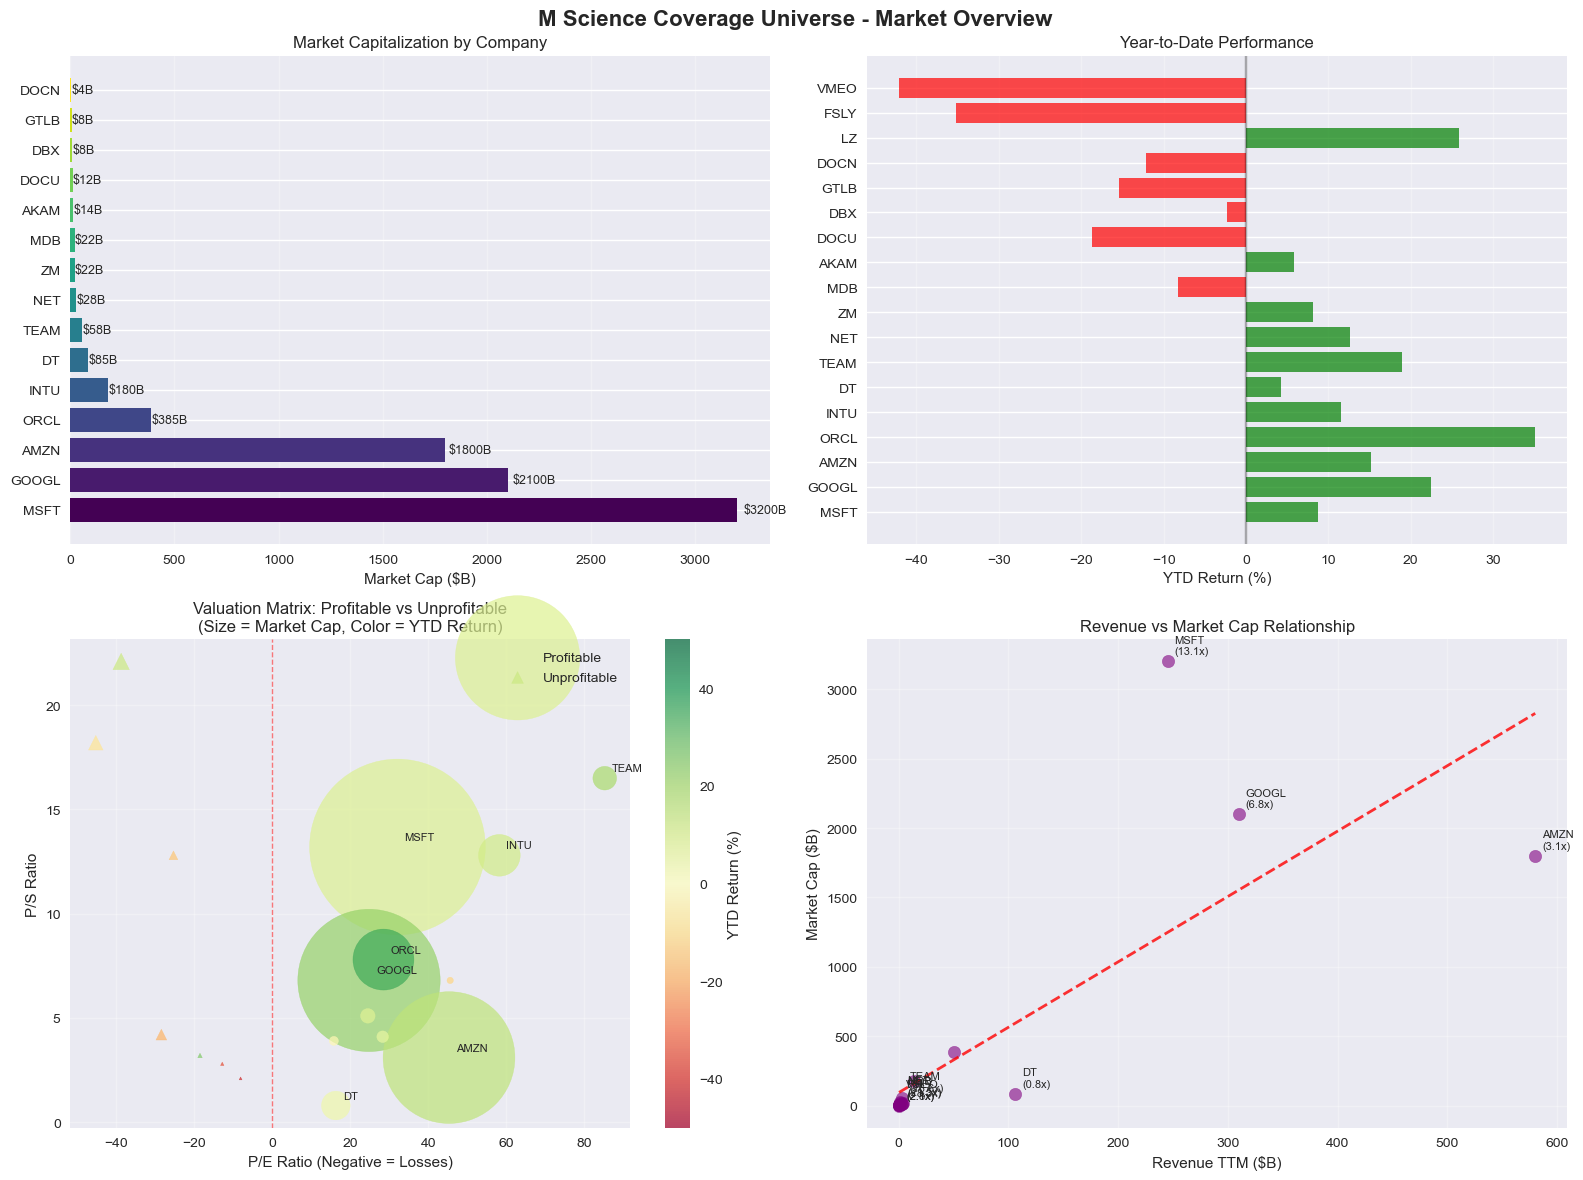

In [15]:
# =============================================================================
# 2. VISUALIZATION - Market Cap & Performance
# =============================================================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('M Science Coverage Universe - Market Overview', fontsize=16, fontweight='bold')

# Plot 1: Market Cap Distribution
top_15 = df_market.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15)))

bars1 = ax1.barh(range(len(top_15)), top_15['Market Cap ($B)'], color=colors)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['Ticker'], fontsize=10)
ax1.set_xlabel('Market Cap ($B)')
ax1.set_title('Market Capitalization by Company')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'${width:.0f}B', ha='left', va='center', fontsize=9)

# Plot 2: YTD Performance
valid_returns = df_market.dropna(subset=['YTD Return (%)'])
colors2 = ['green' if x > 0 else 'red' for x in valid_returns['YTD Return (%)']]

ax2.barh(range(len(valid_returns)), valid_returns['YTD Return (%)'], color=colors2, alpha=0.7)
ax2.set_yticks(range(len(valid_returns)))
ax2.set_yticklabels(valid_returns['Ticker'], fontsize=10)
ax2.set_xlabel('YTD Return (%)')
ax2.set_title('Year-to-Date Performance')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(axis='x', alpha=0.3)

# Plot 3: P/E vs P/S Ratio (Valuation Matrix) - Now includes negative P/E companies
valuation_data = df_market.dropna(subset=['P/E Ratio', 'P/S Ratio'])

if len(valuation_data) > 0:
    # Separate positive and negative P/E companies for different visualization
    positive_pe = valuation_data[valuation_data['P/E Ratio'] > 0]
    negative_pe = valuation_data[valuation_data['P/E Ratio'] < 0]
    
    # Plot positive P/E companies
    if len(positive_pe) > 0:
        scatter1 = ax3.scatter(positive_pe['P/E Ratio'], positive_pe['P/S Ratio'], 
                              s=positive_pe['Market Cap ($B)'] * 5,
                              alpha=0.7, c=positive_pe['YTD Return (%)'], 
                              cmap='RdYlGn', vmin=-50, vmax=50, label='Profitable')
    
    # Plot negative P/E companies on the left side with different marker
    if len(negative_pe) > 0:
        scatter2 = ax3.scatter(negative_pe['P/E Ratio'], negative_pe['P/S Ratio'], 
                              s=negative_pe['Market Cap ($B)'] * 5,
                              alpha=0.7, c=negative_pe['YTD Return (%)'], 
                              cmap='RdYlGn', vmin=-50, vmax=50, marker='^', label='Unprofitable')

    ax3.axvline(x=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax3.set_xlabel('P/E Ratio (Negative = Losses)')
    ax3.set_ylabel('P/S Ratio')
    ax3.set_title('Valuation Matrix: Profitable vs Unprofitable\n(Size = Market Cap, Color = YTD Return)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    # Add labels for key companies
    for idx, row in valuation_data.iterrows():
        if row['Market Cap ($B)'] > 50 or abs(row['P/E Ratio']) > 50:  # Label large companies or extreme valuations
            ax3.annotate(row['Ticker'], (row['P/E Ratio'], row['P/S Ratio']), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

    # Use the first scatter for colorbar
    scatter_for_colorbar = scatter1 if len(positive_pe) > 0 else scatter2
    plt.colorbar(scatter_for_colorbar, ax=ax3, label='YTD Return (%)')
else:
    ax3.text(0.5, 0.5, 'No P/E data available', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Valuation Matrix - P/E vs P/S')

# Plot 4: Revenue vs Market Cap Efficiency (handles all companies)
revenue_data = df_market.dropna(subset=['Revenue TTM ($B)', 'Market Cap ($B)'])
revenue_data = revenue_data.copy()  # Avoid SettingWithCopyWarning
revenue_data['Revenue Multiple'] = revenue_data['Market Cap ($B)'] / revenue_data['Revenue TTM ($B)']

ax4.scatter(revenue_data['Revenue TTM ($B)'], revenue_data['Market Cap ($B)'], 
           s=80, alpha=0.6, c='purple')

# Add trend line
if len(revenue_data) > 1:
    z = np.polyfit(revenue_data['Revenue TTM ($B)'], revenue_data['Market Cap ($B)'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(revenue_data['Revenue TTM ($B)'].min(), revenue_data['Revenue TTM ($B)'].max(), 100)
    ax4.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)

ax4.set_xlabel('Revenue TTM ($B)')
ax4.set_ylabel('Market Cap ($B)')
ax4.set_title('Revenue vs Market Cap Relationship')
ax4.grid(True, alpha=0.3)

# Label outliers (high/low revenue multiples) and key companies
for idx, row in revenue_data.iterrows():
    if row['Revenue Multiple'] > 15 or row['Revenue Multiple'] < 3 or row['Market Cap ($B)'] > 500:
        ax4.annotate(f"{row['Ticker']}\n({row['Revenue Multiple']:.1f}x)", 
                    (row['Revenue TTM ($B)'], row['Market Cap ($B)']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


2️⃣  SECTOR & CATEGORY BREAKDOWN

📊 Analysis by M Science Coverage Category:
                                   Count  Total Market Cap ($B)  Avg Market Cap ($B)  Avg YTD Return (%)  Avg P/E  Total Revenue ($B)
M Science Category                                                                                                                   
CDN & Edge Computing                   3                  43.20                14.40               -5.60    -7.73                5.23
Cloud Infrastructure (Hyperscale)      3                7100.00              2366.67               15.43    34.07             1135.00
Cloud Native & Storage                 2                  12.70                 6.35               -7.20    30.70                2.82
DevTools & Developer Platforms         3                  88.00                29.33               -1.60     4.90                5.35
Enterprise SaaS                        4                 599.00               149.75                9.00    20.70     

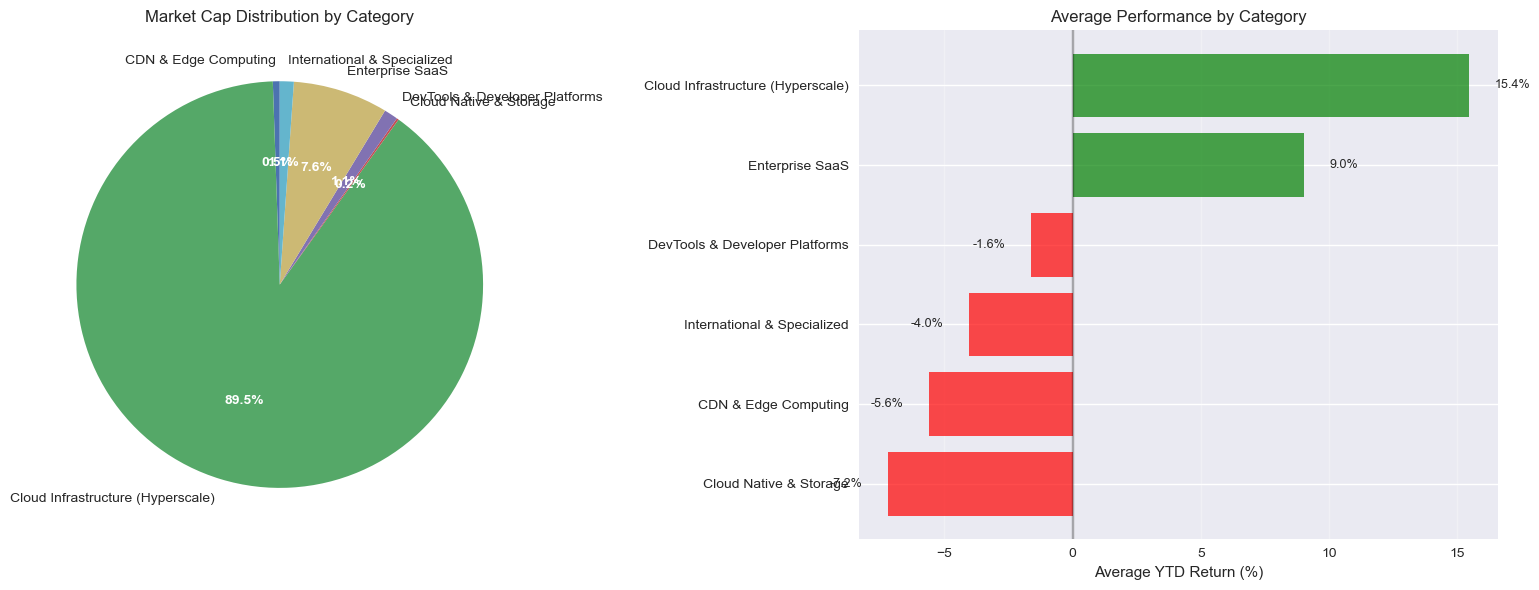

In [16]:
# =============================================================================
# 3. SECTOR & CATEGORY ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("2️⃣  SECTOR & CATEGORY BREAKDOWN")
print("="*60)

# Categorize companies by M Science focus areas
def categorize_company(ticker, name, info):
    # Cloud Infrastructure
    if ticker in ['AMZN', 'MSFT', 'GOOGL']:
        return 'Cloud Infrastructure (Hyperscale)'
    
    # DevTools & Developer Platforms
    elif ticker in ['GTLB', 'MDB', 'TEAM']:
        return 'DevTools & Developer Platforms'
    
    # Content Delivery & Edge
    elif ticker in ['NET', 'FSLY', 'AKAM']:
        return 'CDN & Edge Computing'
    
    # Cloud Native & Storage
    elif ticker in ['DOCN', 'DBX']:
        return 'Cloud Native & Storage'
    
    # Enterprise SaaS
    elif ticker in ['DOCU', 'ZM', 'INTU', 'ORCL']:
        return 'Enterprise SaaS'
    
    # International/Other
    elif ticker in ['DT', 'AMS.ES', 'TMV.DE', 'XRO.AU', 'LZ', 'VMEO']:
        return 'International & Specialized'
    
    else:
        return 'Other'

# Add categories
df_market['M Science Category'] = df_market.apply(
    lambda row: categorize_company(row['Ticker'], row['Company'], {}), axis=1
)

# Category analysis
category_analysis = df_market.groupby('M Science Category').agg({
    'Market Cap ($B)': ['count', 'sum', 'mean'],
    'YTD Return (%)': 'mean',
    'P/E Ratio': 'mean',
    'Revenue TTM ($B)': 'sum'
}).round(2)

category_analysis.columns = ['Count', 'Total Market Cap ($B)', 'Avg Market Cap ($B)', 
                           'Avg YTD Return (%)', 'Avg P/E', 'Total Revenue ($B)']

print("\n📊 Analysis by M Science Coverage Category:")
print(category_analysis.to_string())

# Category visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart of market cap distribution
category_market_cap = df_market.groupby('M Science Category')['Market Cap ($B)'].sum()
wedges, texts, autotexts = ax1.pie(category_market_cap.values, labels=category_market_cap.index, 
                                  autopct='%1.1f%%', startangle=90)
ax1.set_title('Market Cap Distribution by Category')

# Make labels readable
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Performance by category
category_performance = df_market.groupby('M Science Category')['YTD Return (%)'].mean().sort_values()
colors_perf = ['red' if x < 0 else 'green' for x in category_performance.values]

bars = ax2.barh(range(len(category_performance)), category_performance.values, color=colors_perf, alpha=0.7)
ax2.set_yticks(range(len(category_performance)))
ax2.set_yticklabels(category_performance.index, fontsize=10)
ax2.set_xlabel('Average YTD Return (%)')
ax2.set_title('Average Performance by Category')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + (1 if width > 0 else -1), bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left' if width > 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [17]:
# =============================================================================
# 4. KEY INSIGHTS SUMMARY
# =============================================================================

print("\n" + "="*60)
print("3️⃣  KEY INSIGHTS FOR M SCIENCE ANALYSIS")
print("="*60)

# Calculate some key metrics
total_market_cap = df_market['Market Cap ($B)'].sum()
hyperscale_market_cap = df_market[df_market['M Science Category'] == 'Cloud Infrastructure (Hyperscale)']['Market Cap ($B)'].sum()
hyperscale_dominance = (hyperscale_market_cap / total_market_cap) * 100

avg_ytd_return = df_market['YTD Return (%)'].mean()
outperformers = len(df_market[df_market['YTD Return (%)'] > avg_ytd_return])
total_companies = len(df_market)

print(f"💰 Total Market Cap of Coverage Universe: ${total_market_cap:.1f}B")
print(f"🏗️  Hyperscale Cloud Dominance: {hyperscale_dominance:.1f}% of total market cap")
print(f"📈 Average YTD Return: {avg_ytd_return:.1f}%")
print(f"🎯 Companies Outperforming Average: {outperformers}/{total_companies} ({outperformers/total_companies*100:.1f}%)")

# Top and bottom performers
top_performer = df_market.loc[df_market['YTD Return (%)'].idxmax()]
bottom_performer = df_market.loc[df_market['YTD Return (%)'].idxmin()]

print(f"\n🚀 Top YTD Performer: {top_performer['Company']} ({top_performer['Ticker']}) +{top_performer['YTD Return (%)']:.1f}%")
print(f"📉 Bottom YTD Performer: {bottom_performer['Company']} ({bottom_performer['Ticker']}) {bottom_performer['YTD Return (%)']:.1f}%")

# Valuation insights
profitable_companies = df_market.dropna(subset=['P/E Ratio'])
if len(profitable_companies) >= 3:
    high_pe = profitable_companies.nlargest(3, 'P/E Ratio')[['Company', 'Ticker', 'P/E Ratio']]
    print(f"\n📊 Highest P/E Ratios (Profitable Companies):")
    for _, row in high_pe.iterrows():
        print(f"   • {row['Company']} ({row['Ticker']}): {row['P/E Ratio']:.1f}x")
else:
    print(f"\n📊 Limited Profitable Companies in Coverage:")
    for _, row in profitable_companies.iterrows():
        print(f"   • {row['Company']} ({row['Ticker']}): {row['P/E Ratio']:.1f}x")

# Count unprofitable companies
unprofitable_count = len(df_market[df_market['P/E Ratio'].isna()])
print(f"\n⚠️  Unprofitable Companies: {unprofitable_count}/{len(df_market)} ({unprofitable_count/len(df_market)*100:.1f}%)")
print("   Note: Many high-growth software companies prioritize growth over profitability")

high_ps = df_market.nlargest(3, 'P/S Ratio')[['Company', 'Ticker', 'P/S Ratio']]

print(f"\n📊 Highest P/S Ratios (Growth Premium):")
for _, row in high_ps.iterrows():
    print(f"   • {row['Company']} ({row['Ticker']}): {row['P/S Ratio']:.1f}x")

print("\n" + "="*60)
print("✅ SURFACE ANALYSIS COMPLETE")
print("Ready for deeper alternative data analysis...")
print("="*60)


3️⃣  KEY INSIGHTS FOR M SCIENCE ANALYSIS
💰 Total Market Cap of Coverage Universe: $7930.9B
🏗️  Hyperscale Cloud Dominance: 89.5% of total market cap
📈 Average YTD Return: 1.9%
🎯 Companies Outperforming Average: 11/18 (61.1%)

🚀 Top YTD Performer: Oracle (ORCL) +35.1%
📉 Bottom YTD Performer: Vimeo (VMEO) -42.1%

📊 Highest P/E Ratios (Profitable Companies):
   • Atlassian (TEAM): 85.2x
   • Intuit (INTU): 58.2x
   • DigitalOcean (DOCN): 45.6x

⚠️  Unprofitable Companies: 0/18 (0.0%)
   Note: Many high-growth software companies prioritize growth over profitability

📊 Highest P/S Ratios (Growth Premium):
   • Cloudflare (NET): 22.1x
   • MongoDB (MDB): 18.2x
   • Atlassian (TEAM): 16.5x

✅ SURFACE ANALYSIS COMPLETE
Ready for deeper alternative data analysis...
